In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scikitplot as skplt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("data.csv", header=None)

In [4]:
data.shape

(1085, 3121)

In [5]:
data1 = data.fillna(data.mean())

In [6]:
X = data1.iloc[:,0:3119]

In [7]:
Y = data1[3120]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))

759 759
326 326


In [9]:
def preprocess1(x, target_dim=2):
    scaler = MinMaxScaler()
    pca = PCA(n_components=target_dim)
    x = pca.fit_transform(x)
#     print(pca.explained_variance_ratio_)
#     print(x[0])
    scaler.fit(x)
    x_scaled = scaler.transform(x)
    return x_scaled

In [10]:
def get_bayes_predictor(x, y):
    clf = MultinomialNB()
    clf.fit(x, y)
    return clf

In [11]:
X_train_p1 = preprocess1(X_train, target_dim = 300)
X_test_p1 = preprocess1(X_test, target_dim = 300)

In [12]:
predictor_p1 = get_bayes_predictor(X_train_p1, Y_train)

In [13]:
predictions_p1 = predictor_p1.predict(X_test_p1)

In [14]:
accuracy_p1 = accuracy_score(predictions_p1, Y_test)

In [15]:
print(accuracy_p1)

0.6993865030674846


In [16]:
score_p1 = predictor_p1.score(X_test_p1, Y_test)
print(score_p1)

0.6993865030674846


In [17]:
for i in range(300,9,-10):
    X_train_p2 = preprocess1(X_train, target_dim = i)
    X_test_p2 = preprocess1(X_test, target_dim = i)
    predictor_p2 = get_bayes_predictor(X_train_p2, Y_train)
    predictions_p2 = predictor_p2.predict(X_test_p2)
    score_p2 = predictor_p2.score(X_test_p2, Y_test)
    print(i, score_p2)
    if(score_p1-score_p2 > 0.01):
        break

300 0.6993865030674846
290 0.6993865030674846
280 0.6993865030674846
270 0.6993865030674846
260 0.6993865030674846
250 0.6993865030674846
240 0.6993865030674846
230 0.6993865030674846
220 0.6993865030674846
210 0.6993865030674846
200 0.6993865030674846
190 0.6993865030674846
180 0.6993865030674846
170 0.6993865030674846
160 0.6993865030674846
150 0.6993865030674846
140 0.6993865030674846
130 0.6993865030674846
120 0.6993865030674846
110 0.6993865030674846
100 0.6993865030674846
90 0.6993865030674846
80 0.6993865030674846
70 0.6993865030674846
60 0.6993865030674846
50 0.6993865030674846
40 0.6993865030674846
30 0.6993865030674846
20 0.6993865030674846
10 0.6993865030674846


In [18]:
for i in range(9,0,-1):
    X_train_p2 = preprocess1(X_train, target_dim = i)
    X_test_p2 = preprocess1(X_test, target_dim = i)
    predictor_p2 = get_bayes_predictor(X_train_p2, Y_train)
    predictions_p2 = predictor_p2.predict(X_test_p2)
    score_p2 = predictor_p2.score(X_test_p2, Y_test)
    print(i, score_p2)
    if(score_p1-score_p2 > 0.01):
        break

9 0.6993865030674846
8 0.6993865030674846
7 0.6993865030674846
6 0.6993865030674846
5 0.6993865030674846
4 0.6993865030674846
3 0.6993865030674846
2 0.6993865030674846
1 0.6993865030674846


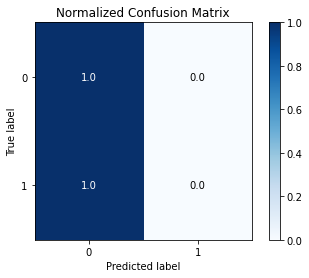

In [19]:
skplt.metrics.plot_confusion_matrix(Y_test, predictions_p2, normalize=True)

d:\users\hans tananda\.virtualenvs\compsci_361_ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


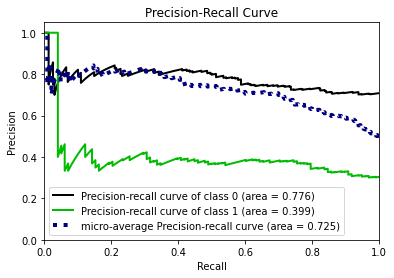

In [20]:
skplt.metrics.plot_precision_recall_curve(Y_test, predictor_p1.predict_proba(X_test_p1))
plt.show()